In [49]:
%matplotlib inline

import os
import shutil
import random
import torch
import torchvision
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

torch.manual_seed(0)

print('Using PyTorch version', torch.__version__)

Using PyTorch version 1.6.0+cu101


In [3]:
TARGET_DIR="/content/Dataset/halfsleeve"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("halfsleeve folder created")

halfsleeve folder created


In [4]:
TARGET_DIR="/content/Dataset/nosleeve"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("nosleeve folder created")

nosleeve folder created


In [5]:
TARGET_DIR="/content/Dataset/threebyfour"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("threebyfour folder created")

threebyfour folder created


In [6]:
FILE_PATH='/content/Dataset/sleeves_halfsleeveshirt'
TARGET_halfsleeve_DIR="/content/Dataset/halfsleeve"
IMAGES_PATH='/content/Dataset/sleeves_halfsleeveshirt'
image_names= os.listdir(FILE_PATH)
#image_names

In [7]:
for i in range(90):
    image_name=image_names[i]
    image_path=os.path.join(FILE_PATH,image_name)
    target_path=os.path.join(TARGET_halfsleeve_DIR,image_name)
    shutil.copy2(image_path,target_path)
    #print("copying image",i)

In [8]:
FILE_PATH_nosleeve="/content/Dataset/sleeves_tshirtnosleeve"
TARGET_nosleeve_DIR="/content/Dataset/nosleeve"
IMAGES_PATH_nosleeve="/content/Dataset/sleeves_tshirtnosleeve"
image_names= os.listdir(FILE_PATH_nosleeve)
print(len(image_names))

306


In [9]:
for i in range(len(image_names)):
    image_name=image_names[i]
    image_path=os.path.join(FILE_PATH_nosleeve,image_name)
    target_path=os.path.join(TARGET_nosleeve_DIR,image_name)
    shutil.copy2(image_path,target_path)
    #print("copying image",i)

In [10]:
FILE_PATH_threebyfour="/content/Dataset/sleeves_tshirtthreebyfourSleeve"
TARGET_threebyfour_DIR="/content/Dataset/threebyfour"
IMAGES_PATH_threebyfour="/content/Dataset/sleeves_tshirtthreebyfourSleeve"
image_names= os.listdir(FILE_PATH_threebyfour)
#image_names

In [11]:
for i in range(len(image_names)):
    image_name=image_names[i]
    image_path=os.path.join(FILE_PATH_threebyfour,image_name)
    target_path=os.path.join(TARGET_threebyfour_DIR,image_name)
    shutil.copy2(image_path,target_path)
    #print("copying image",i)

In [12]:
class_names = ['halfsleeve', 'nosleeve', 'threebyfour']
root_dir = '/content/Dataset'
source_dirs = ['halfsleeve', 'nosleeve', 'threebyfour']

if os.path.isdir(os.path.join(root_dir, source_dirs[1])):
    os.mkdir(os.path.join(root_dir, 'test'))

    for i, d in enumerate(source_dirs):
        os.rename(os.path.join(root_dir, d), os.path.join(root_dir, class_names[i]))

    for c in class_names:
        os.mkdir(os.path.join(root_dir, 'test', c))

    for c in class_names:
        images = [x for x in os.listdir(os.path.join(root_dir, c)) if x.lower().endswith('jpg')]
        selected_images = random.sample(images, 30)
        for image in selected_images:
            source_path = os.path.join(root_dir, c, image)
            target_path = os.path.join(root_dir, 'test', c, image)
            shutil.move(source_path, target_path)

In [13]:
class ClothData(torch.utils.data.Dataset):
    def __init__(self, image_dirs, transform):
        def get_images(class_name):
            images = [x for x in os.listdir(image_dirs[class_name]) if x[-3:].lower().endswith('jpg')]
            print(f'Found {len(images)} {class_name} examples')
            return images
        
        self.images = {}
        self.class_names = ['halfsleeve', 'nosleeve', 'threebyfour']
        
        for class_name in self.class_names:
            self.images[class_name] = get_images(class_name)
            
        self.image_dirs = image_dirs
        self.transform = transform
        
    
    def __len__(self):
        return sum([len(self.images[class_name]) for class_name in self.class_names])
    
    
    def __getitem__(self, index):
        class_name = random.choice(self.class_names)
        index = index % len(self.images[class_name])
        image_name = self.images[class_name][index]
        image_path = os.path.join(self.image_dirs[class_name], image_name)
        image = Image.open(image_path).convert('RGB')
        return self.transform(image), self.class_names.index(class_name)

In [14]:
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [15]:
train_dirs = {
    'halfsleeve': 'Dataset/halfsleeve',
    'nosleeve': 'Dataset/nosleeve',
    'threebyfour': 'Dataset/threebyfour'
}

train_dataset = ClothData(train_dirs, train_transform)

Found 58 halfsleeve examples
Found 264 nosleeve examples
Found 288 threebyfour examples


In [16]:
test_dirs = {
    'halfsleeve': 'Dataset/test/halfsleeve',
    'nosleeve': 'Dataset/test/nosleeve',
    'threebyfour': 'Dataset/test/threebyfour'
}

test_dataset = ClothData(test_dirs, test_transform)


Found 30 halfsleeve examples
Found 30 nosleeve examples
Found 30 threebyfour examples


In [17]:
batch_size = 6

dl_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

print('Number of training batches', len(dl_train))
print('Number of test batches', len(dl_test))

Number of training batches 102
Number of test batches 15


In [18]:
class_names = train_dataset.class_names


def show_images(images, labels, preds):
    plt.figure(figsize=(8, 4))
    for i, image in enumerate(images):
        plt.subplot(1, 6, i + 1, xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image)
        col = 'green'
        if preds[i] != labels[i]:
            col = 'red'
            
        plt.xlabel(f'{class_names[int(labels[i].numpy())]}')
        plt.ylabel(f'{class_names[int(preds[i].numpy())]}', color=col)
    plt.tight_layout()
    plt.show()

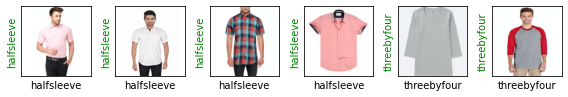

In [19]:
train_images, train_labels = next(iter(dl_train))
show_images(train_images, train_labels, train_labels)

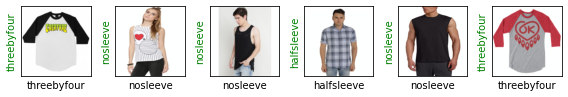

In [20]:
test_images, test_labels = next(iter(dl_test))
show_images(test_images, test_labels, test_labels)

In [42]:
from numpy import vstack
from numpy import argmax
from sklearn.metrics import accuracy_score
#from torchvision.datasets import MNIST
from torchvision.transforms import Compose
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize
from torch.utils.data import DataLoader
from torch.nn import Conv2d
from torch.nn import MaxPool2d
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

In [43]:
# model definition
class CNN(Module):

    # define model elements
    def __init__(self, n_channels):
      
      #print(n_channels)
    #def __init__(self):
      super(CNN, self).__init__()

      # input to first hidden layer
      self.hidden1 = Conv2d(n_channels, 32, (3,3))
      #self.hidden1 = Conv2d(n_channels, 6, (3,3))
      #self.hidden1 = Conv2d(3, 32, (3,3))
        

      kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
      self.act1 = ReLU()
      # first pooling layer
      self.pool1 = MaxPool2d((2,2), stride=(2,2))

      # second hidden layer
      self.hidden2 = Conv2d(32, 32, (3,3))
      #self.hidden2 = Conv2d(1, 32, (3,3))

      kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
      self.act2 = ReLU()
      # second pooling layer
      self.pool2 = MaxPool2d((2,2), stride=(2,2))
      # fully connected layer
      #self.hidden3 = Linear(5*5*32, 100)
      self.hidden3 = Linear(3*144*216, 6)
      kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
      self.act3 = ReLU()
      # output layer
      #self.hidden4 = Linear(100, 10)
      self.hidden4 = Linear(6, 6)
      xavier_uniform_(self.hidden4.weight)
      self.act4 = Softmax(dim=1)
 
    # forward propagate input
    def forward(self, X):
      # input to first hidden layer
      X = self.hidden1(X)
      X = self.act1(X)
      X = self.pool1(X)
      # second hidden layer
      X = self.hidden2(X)
      X = self.act2(X)
      X = self.pool2(X)
      # flatten
      #X = X.view(-1, 4*4*50)
      X = X.view(X.size(0), 3*144*216)
      # third hidden layer
      X = self.hidden3(X)
      X = self.act3(X)
      # output layer
      X = self.hidden4(X)
      X = self.act4(X)
      return X



In [44]:
# train the model
def train_model(dl_train, model):
    # define the optimization
    criterion = CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(10):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(dl_train):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

In [53]:
# evaluate the model
def evaluate_model(dl_test, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(dl_test):
        # evaluate the model on the test set
        yhat = model(inputs)

        #print("evaluate the model on the test set\n")
        #yhat.shape
        #yhat.size
        #print(yhat)

        # retrieve numpy array
        yhat = yhat.detach().numpy()

        #print("retrieve numpy array\n")
        #yhat.shape
        #yhat.size
        #print(yhat)

        actual = targets.numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        #yhat = argmax(yhat, axis=0)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc


In [46]:
print(len(dl_train.dataset), len(dl_test.dataset))

610 90


In [47]:
# define the network
#model = CNN(1)
model = CNN(3)
#x = torch.randn(1, 1, 32, 32)
#out = model(x)

In [51]:
# # train the model
train_model(dl_train, model)

In [54]:
# evaluate the model
acc = evaluate_model(dl_test, model)
print('Accuracy: %.3f' % acc)

Accuracy: 0.367


In [86]:
#from sklearn.model_selection import train_test_split

In [85]:
#X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [83]:
'''
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))
'''

'\nmodel = Sequential()\nmodel.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters=32, kernel_size=(5, 5), activation=\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters=64, kernel_size=(5, 5), activation=\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation=\'relu\'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(64, activation=\'relu\'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(25, activation=\'sigmoid\'))\n'